# Zomato Data Analysis Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Zomato data .csv")

In [21]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [23]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


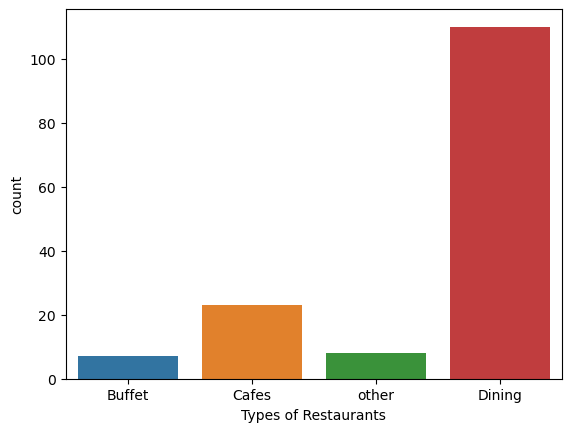

In [53]:
sns.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)'])
plt.xlabel("Types of Restaurants")
plt.show()

# The majority of the restaurant falls under the dining category.

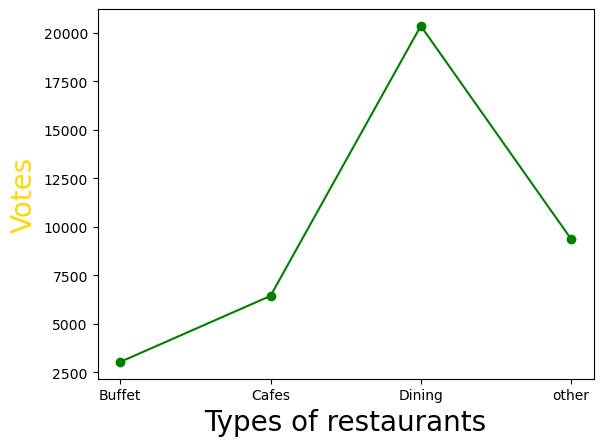

In [85]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : group_data})
plt.plot(result.index,result['votes'] ,c="green",marker="o")
plt.xlabel("Types of restaurants", c="black",size=20)
plt.ylabel("Votes",c="gold",size=20)
plt.show()

# Dinning restaurants received the most votes

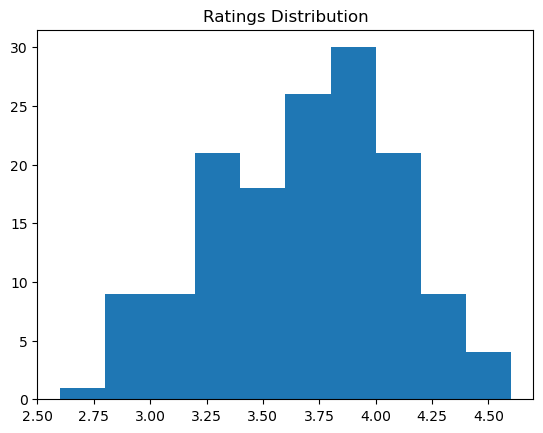

In [93]:
plt.hist(df['rate'],bins = 10)
plt.title("Ratings Distribution")
plt.show()

# Majority of rating for the restaurant is 3.75 to 4.00

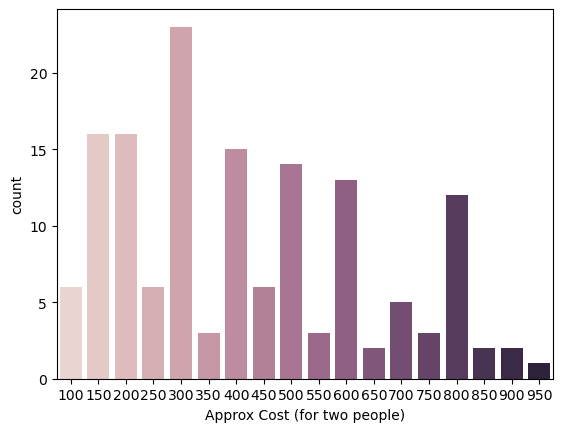

In [116]:
sns.countplot(x=df['approx_cost(for two people)'], hue=df['approx_cost(for two people)'])
plt.xlabel("Approx Cost (for two people)")
plt.legend([], [], frameon=False)
plt.show()

# The majority couples prefer restaurant with approx cost of 300 to 200 

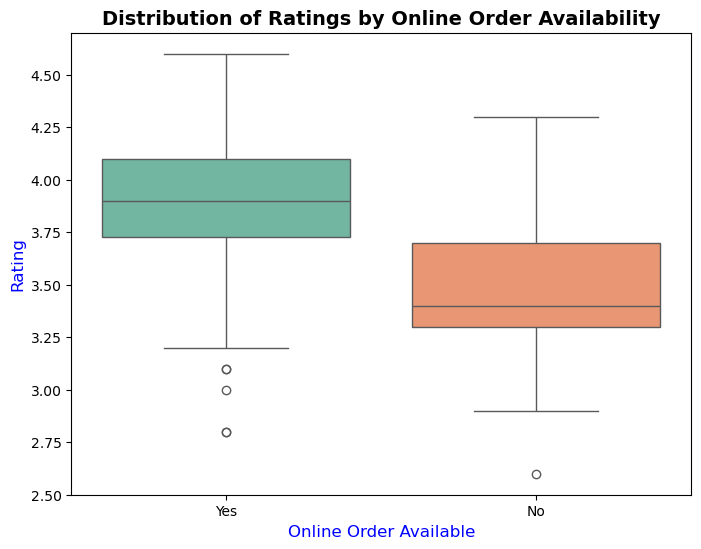

In [137]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='online_order', y='rate',hue='online_order', data=df, palette="Set2")

plt.xlabel("Online Order Available", fontsize=12, color="blue")
plt.ylabel("Rating", fontsize=12, color="blue")
plt.title("Distribution of Ratings by Online Order Availability", fontsize=14, fontweight='bold')

plt.show()


# Offline orders receive lower rating in comparison to online orders

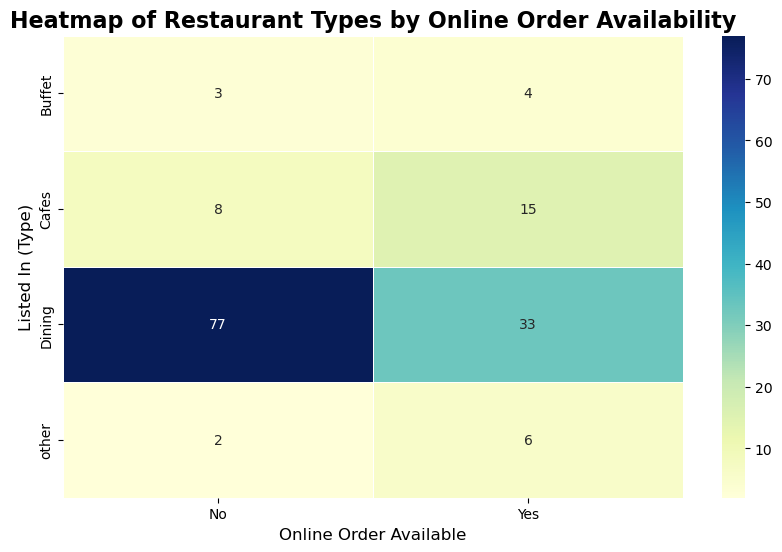

In [150]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d', linewidths=.5)

plt.title("Heatmap of Restaurant Types by Online Order Availability", fontsize=16, fontweight='bold')
plt.xlabel("Online Order Available", ffontsize=12)
plt.ylabel("Listed In (Type)", fontsize=12)

plt.show()


# Dining restaurant primary accept offline orders whereas cafes primarily receive online orders This suggests that client preferred order in person at restaurant, but prefer online ordering at cafes